## Goal: Eliminate unnecessary columns, create some obvious features, minimize Nan values, and separate into Items, Orders, and Customers DataFrames

In [1]:
import os
import pandas as pd
import numpy as np
import datetime
import pickle

In [2]:
# change to the path with the raw csv file data
os.chdir("C:\Springboard\Github\Capstone2_cust\Intermediate_Data")
# load the pickled version of the 
df = pickle.load(open("cust_pub4.pkl", "rb"))
# look at the first 10 rows of this file
df.head(10)

,Name,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,...,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Receipt Number,Server,ship_bill,Area_Code,Cust_ID
0,#64088,paid,2020-09-12 05:49:40 -0700,unfulfilled,NaN,no,USD,25.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,gmail.com,True,NaN,2.779653e+12
1,#64087,paid,2020-09-12 05:36:26 -0700,unfulfilled,NaN,no,USD,90.68,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,gmail.com,True,NaN,2.779539e+12
2,#64087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,gmail.com,False,NaN,2.779539e+12
3,#64087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,gmail.com,False,NaN,2.779539e+12
4,#64086,paid,2020-09-12 05:28:27 -0700,unfulfilled,NaN,yes,USD,54.97,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,gmail.com,True,803,2.779470e+12
5,#64086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,gmail.com,False,NaN,2.779470e+12
6,#64085,paid,2020-09-12 05:26:56 -0700,unfulfilled,NaN,no,USD,54.97,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,gmail.com,True,NaN,2.779457e+12
7,#64085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,gmail.com,False,NaN,2.779457e+12
8,#64084,paid,2020-09-12 05:07:11 -0700,unfulfilled,NaN,no,USD,24.98,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,gmail.com,True,NaN,2.779303e+12
9,#64084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,gmail.com,False,NaN,2.779303e+12


In [3]:
# let's drop all of the tax columns from this DF
df.drop(['Tax 1 Name', 'Tax 1 Value', 'Tax 2 Name', 'Tax 2 Value', 'Tax 3 Name', 'Tax 3 Value', 'Tax 4 Name', 'Tax 4 Value',
       'Tax 5 Name', 'Tax 5 Value'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142224 entries, 0 to 142223
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         142224 non-null  object 
 1   Financial Status             63084 non-null   object 
 2   Paid at                      61027 non-null   object 
 3   Fulfillment Status           63084 non-null   object 
 4   Fulfilled at                 62270 non-null   object 
 5   Accepts Marketing            63084 non-null   object 
 6   Currency                     63084 non-null   object 
 7   Subtotal                     63084 non-null   float64
 8   Shipping                     63084 non-null   float64
 9   Taxes                        63084 non-null   float64
 10  Total                        63084 non-null   float64
 11  Discount Code                7212 non-null    object 
 12  Discount Amount              63084 non-null   float64
 13 

In [5]:
# we noticed from the first 10 rows that some of these values aren't filled. Let's use forward fill since that is the same order
df['Paid at'].fillna(method='ffill', inplace=True, limit=None)

In [6]:
# we need to convert the "Paid at" column into datetime
df['Paid at'] = pd.to_datetime(df['Paid at'], infer_datetime_format=True)

In [7]:
df.head(10)

,Name,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,...,Id,Tags,Risk Level,Source,Lineitem discount,Receipt Number,Server,ship_bill,Area_Code,Cust_ID
0,#64088,paid,2020-09-12 05:49:40-07:00,unfulfilled,NaN,no,USD,25.00,0.0,0.0,...,2.779653e+12,NaN,Low,web,0.0,NaN,gmail.com,True,NaN,2.779653e+12
1,#64087,paid,2020-09-12 05:36:26-07:00,unfulfilled,NaN,no,USD,90.68,0.0,0.0,...,2.779539e+12,NaN,Low,web,0.0,NaN,gmail.com,True,NaN,2.779539e+12
2,#64087,NaN,2020-09-12 05:36:26-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,gmail.com,False,NaN,2.779539e+12
3,#64087,NaN,2020-09-12 05:36:26-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,gmail.com,False,NaN,2.779539e+12
4,#64086,paid,2020-09-12 05:28:27-07:00,unfulfilled,NaN,yes,USD,54.97,0.0,0.0,...,2.779470e+12,NaN,Low,web,0.0,NaN,gmail.com,True,803,2.779470e+12
5,#64086,NaN,2020-09-12 05:28:27-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,gmail.com,False,NaN,2.779470e+12
6,#64085,paid,2020-09-12 05:26:56-07:00,unfulfilled,NaN,no,USD,54.97,5.0,0.0,...,2.779457e+12,NaN,Low,web,0.0,NaN,gmail.com,True,NaN,2.779457e+12
7,#64085,NaN,2020-09-12 05:26:56-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,gmail.com,False,NaN,2.779457e+12
8,#64084,paid,2020-09-12 05:07:11-07:00,unfulfilled,NaN,no,USD,24.98,3.0,0.0,...,2.779303e+12,NaN,Low,web,0.0,NaN,gmail.com,True,NaN,2.779303e+12
9,#64084,NaN,2020-09-12 05:07:11-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,gmail.com,False,NaN,2.779303e+12


In [8]:
# let's drop some more useless columns
df.drop(['Taxes', 'Notes', 'Note Attributes',
       'Cancelled at'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142224 entries, 0 to 142223
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         142224 non-null  object 
 1   Financial Status             63084 non-null   object 
 2   Paid at                      142224 non-null  object 
 3   Fulfillment Status           63084 non-null   object 
 4   Fulfilled at                 62270 non-null   object 
 5   Accepts Marketing            63084 non-null   object 
 6   Currency                     63084 non-null   object 
 7   Subtotal                     63084 non-null   float64
 8   Shipping                     63084 non-null   float64
 9   Total                        63084 non-null   float64
 10  Discount Code                7212 non-null    object 
 11  Discount Amount              63084 non-null   float64
 12  Shipping Method              62285 non-null   object 
 13 

In [10]:
# Reciept Number is empty - drop that
# Fullfilled at is missing a lot of values - we are using 'Paid at '
# remove a few more columns that are too sparse to be useful in modeling
df.drop(['Fulfilled at', 'Receipt Number', 'Location', 'Device ID', 'Id', 'Risk Level'], axis=1, inplace=True)

In [11]:
# Let's see what currencies are used
df['Currency'].value_counts()

USD    63084
Name: Currency, dtype: int64

In [12]:
# it's just USD ($) or NaN. Not worth keeping that column
df.drop(['Currency'], axis=1, inplace=True)

In [13]:
# let's look at Paid at vs. Created at
df[['Paid at', 'Created at']].sample(10)

,Paid at,Created at
125031,2019-10-05 04:53:47-07:00,2019-10-05 04:53:46 -0700
32728,2020-06-28 12:01:56-07:00,2020-06-28 12:01:55 -0700
73399,2020-03-25 07:13:19-07:00,2020-03-25 07:13:18 -0700
49675,2020-05-21 21:29:22-07:00,2020-05-21 21:29:22 -0700
29324,2020-07-06 07:33:42-07:00,2020-07-06 07:33:41 -0700
53879,2020-05-11 08:28:23-07:00,2020-05-11 08:28:22 -0700
106808,2019-12-09 19:47:42-08:00,2019-12-09 19:41:28 -0800
73271,2020-03-25 10:14:17-07:00,2020-03-25 10:14:16 -0700
56555,2020-05-02 16:41:58-07:00,2020-05-02 16:41:57 -0700
84728,2020-02-13 18:42:21-08:00,2020-02-13 18:42:20 -0800


Those looks to be identical except for a 1-2 second lag for the payment. I'm good with dropping the paid at column

In [14]:
df.drop(['Paid at'], axis=1, inplace=True)

In [15]:
# since we are using 'Created at' as the time stamp, let's convert it to date time
# we need to convert the "Paid at" column into datetime
df['Created at'] = pd.to_datetime(df['Created at'], infer_datetime_format=True, utc=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142224 entries, 0 to 142223
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype              
---  ------                       --------------   -----              
 0   Name                         142224 non-null  object             
 1   Financial Status             63084 non-null   object             
 2   Fulfillment Status           63084 non-null   object             
 3   Accepts Marketing            63084 non-null   object             
 4   Subtotal                     63084 non-null   float64            
 5   Shipping                     63084 non-null   float64            
 6   Total                        63084 non-null   float64            
 7   Discount Code                7212 non-null    object             
 8   Discount Amount              63084 non-null   float64            
 9   Shipping Method              62285 non-null   object             
 10  Created at                   142

### These look pretty good. Now, it's time to start filling in some of the NaN values

In [17]:
# For financial status
df['Financial Status'].value_counts()

paid                  61766
refunded                690
partially_refunded      616
partially_paid            7
pending                   5
Name: Financial Status, dtype: int64

In [18]:
# it looks like the first line of an order has that Financial Status; we'll forward fill
df['Financial Status'].fillna(method='ffill', inplace=True, limit=25)

In [19]:
# same applies for Fulfillment Status
df['Fulfillment Status'].fillna(method='ffill', inplace=True, limit=25)

In [20]:
# same is true for Accepts Marketing
df['Accepts Marketing'].fillna(method='ffill', inplace=True, limit=25)

In [21]:
df['Tags'].value_counts()

Subscription, Subscription Recurring Order                                                                                                    1113
Subscription, Subscription First Order                                                                                                         896
recurring_order                                                                                                                                480
0-100137263438, CartHook Checkout, carthook-skinquiz-minikits, ch_FID_carthook-skinquiz-minikit, ch_id_H7WWZqswDx8D5DW9jH9d                      3
0-3DB542442Y809192H, carthook-checkout, ch_FID_carthook-checkout, ch_id_0htFEtCty4bxpLxlrrqK                                                     3
                                                                                                                                              ... 
0-100137528373, carthook-checkout, ch_FID_carthook-checkout, ch_id_JqNIoL9MO0ZXUOdlKj77                               

In [22]:
# these look unnecessarily complicated, so we'll drop - or maybe not
# df.drop(['Tags'], axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142224 entries, 0 to 142223
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype              
---  ------                       --------------   -----              
 0   Name                         142224 non-null  object             
 1   Financial Status             142217 non-null  object             
 2   Fulfillment Status           142217 non-null  object             
 3   Accepts Marketing            142217 non-null  object             
 4   Subtotal                     63084 non-null   float64            
 5   Shipping                     63084 non-null   float64            
 6   Total                        63084 non-null   float64            
 7   Discount Code                7212 non-null    object             
 8   Discount Amount              63084 non-null   float64            
 9   Shipping Method              62285 non-null   object             
 10  Created at                   142

In [24]:
# let's look at Payment Reference
df['Payment Reference'].value_counts()

c11827083116601.1    1
#62488.1             1
c14170790297768.1    1
#41498.1             1
c11876107780153.1    1
                    ..
c12318601543737.1    1
c5354420895801.1     1
#63297.1             1
c14929553752232.1    1
c14964313325736.1    1
Name: Payment Reference, Length: 61651, dtype: int64

In [25]:
# let's drop it
df.drop(['Payment Reference'], axis=1, inplace=True)

In [26]:
# let's create one more feature that would be usable: total items in an order
df['ITEMS'] = df.groupby('Name')['Lineitem quantity'].transform('sum')

In [27]:
df['ITEMS'].unique()

array([  1,   3,   2,   5,   4,   6,  10,   7,   8,  11,  12,   9,  14,
        22,  15,  80,  20,  40,  19,  18,  30,  50,  52,  45,  33,  16,
        13, 100,  25,  35,  26,  21,  17], dtype=int64)

In [28]:
# see how many unique "names" are in the DF
df['Name'].value_counts()

#5957     33
#60457    22
#34086    20
#25140    19
#10488    16
          ..
#3808      1
#39760     1
#5266      1
#4608      1
#10371     1
Name: Name, Length: 63084, dtype: int64

This looks like the same number of "subtotal" and some other fields that are order specific.

In [29]:
# let see if we can use the compare at price relative to the lineitem price as another feature
df['compared'] = (df['Lineitem compare at price'] - df['Lineitem price'])/df['Lineitem price']
# positive values mean the line item price is cheaper
# this relative price is more important than the absolute

In [30]:
# let's convert this to a difference in price
df['Lineitem compare at price'] = df['Lineitem compare at price'] - df['Lineitem price']

### Separate the Dataframe <br>
Right now, the items and the orders are each lines in the DataFrame; we are going to separate out the orders and items in the order into 2 separate dataframes:
### 1. Order - contains the order information
### 2. Items - line by line items contained in an order
### 3. Customers - contains the sum of the orders and items

In [31]:
# create Order DF by taking the first line of a name
Order = df.groupby('Name').first()

# or I could do it groupby Name and then take the value that has a subtotal that is not null

In [32]:
Order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63084 entries, #10000 to #9999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   Financial Status             63084 non-null  object             
 1   Fulfillment Status           63084 non-null  object             
 2   Accepts Marketing            63084 non-null  object             
 3   Subtotal                     63084 non-null  float64            
 4   Shipping                     63084 non-null  float64            
 5   Total                        63084 non-null  float64            
 6   Discount Code                7212 non-null   object             
 7   Discount Amount              63084 non-null  float64            
 8   Shipping Method              62285 non-null  object             
 9   Created at                   63084 non-null  datetime64[ns, UTC]
 10  Lineitem quantity            63084 non-null  i

In [33]:
# let's look at discount codes
Order['Discount Code'].value_counts()

BAMBUBEAUTY              1404
THANKYOU10                664
save10                    559
Custom discount           274
CARACLARKNUTRITION        221
                         ... 
54927277b0c7                1
664e9ac7ed3e                1
0b43677c678a                1
3/4 full product            1
b07fc9c1925b-8besesa2       1
Name: Discount Code, Length: 920, dtype: int64

The most popular discount codes are used largely enough that they could provide some value, but the largest code is used on 2% of all orders; discount codes are used on 11% of orders. I think it's best to just consider the discount amount to start and that's already contained in another column, so we'll drop this column.

In [34]:
Order.drop(['Discount Code'], axis=1, inplace=True)

In [35]:
# for orders, it shouldn't matter if that particular items is taxable, so we'll drop that or the fulfillment status
Order.drop(['Lineitem taxable', 'Lineitem fulfillment status'], axis=1, inplace=True)

In [36]:
Order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63084 entries, #10000 to #9999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   Financial Status            63084 non-null  object             
 1   Fulfillment Status          63084 non-null  object             
 2   Accepts Marketing           63084 non-null  object             
 3   Subtotal                    63084 non-null  float64            
 4   Shipping                    63084 non-null  float64            
 5   Total                       63084 non-null  float64            
 6   Discount Amount             63084 non-null  float64            
 7   Shipping Method             62285 non-null  object             
 8   Created at                  63084 non-null  datetime64[ns, UTC]
 9   Lineitem quantity           63084 non-null  int64              
 10  Lineitem name               63084 non-null  object        

In [37]:
# let's fill the payment method with "unknown for the missing values"
Order['Payment Method'].fillna(value='Unknown', inplace=True)

In [38]:
# let's look at Line item requires shipping
Order['Lineitem requires shipping'].value_counts()

True     33591
False    29493
Name: Lineitem requires shipping, dtype: int64

That seems reasonable enough; let's keep that

In [39]:
Order['Lineitem sku'].isna().sum()

2050

In [40]:
# let's drop some more unnecessary info; line item name should be covered in the sku
Order['Lineitem sku'].fillna(value=Order['Lineitem name'], inplace=True)
Order.drop(['Lineitem name'], axis=1, inplace=True)

In [41]:
Order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63084 entries, #10000 to #9999
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   Financial Status            63084 non-null  object             
 1   Fulfillment Status          63084 non-null  object             
 2   Accepts Marketing           63084 non-null  object             
 3   Subtotal                    63084 non-null  float64            
 4   Shipping                    63084 non-null  float64            
 5   Total                       63084 non-null  float64            
 6   Discount Amount             63084 non-null  float64            
 7   Shipping Method             62285 non-null  object             
 8   Created at                  63084 non-null  datetime64[ns, UTC]
 9   Lineitem quantity           63084 non-null  int64              
 10  Lineitem price              63084 non-null  float64       

In [42]:
# Customer ID should be an integer - but this gets weird, so we'll skip it.
# Order['Cust_ID'] = Order['Cust_ID'].astype('int')

In [43]:
# let's find out how this shipping method looks
Order['Shipping Method'].value_counts()

Standard Shipping (5-7 Business Days)             20338
USPS First Class Package (5-7 Business Days)      14909
USPS First Class Package (2-5 Business Days)       7680
Free Shipping (5-8 Business Days)                  6902
Priority Mail                                      2349
Fedex 2Day (2-3 Business Days)                     1124
First Class Package                                 925
Flat Rate Shipping                                  818
Standard Shipping (5-8 Business Days)               781
USPS Priority Mail (1-3 Business Days)              772
Free shipping                                       742
Standard Shipping (free)                            696
Priority Mail (2-4 Business Days)                   569
UPS® Ground                                         539
USPS First Class International                      503
Always Free Shipping                                480
Free shipping for orders over $99                   463
USPS First Class                                

In [44]:
# let's fill that shipping method with unknown - Shipping Method
Order['Shipping Method'].fillna(value='Unknown', inplace=True)

In [45]:
Order.head(10)

,Financial Status,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Total,Discount Amount,Shipping Method,Created at,Lineitem quantity,...,Employee,Tags,Source,Lineitem discount,Server,ship_bill,Area_Code,Cust_ID,ITEMS,compared
Name,,,,,,,,,,,,,,,,,,,,,
#10000,paid,fulfilled,yes,8.0,0.00,8.62,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 15:49:51+00:00,1,...,False,NaN,web,0.0,gmail.com,True,NaN,2.029549e+12,1,NaN
#10001,paid,fulfilled,yes,44.0,0.00,44.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 16:22:12+00:00,1,...,False,NaN,web,0.0,gmail.com,True,NaN,2.604838e+12,2,NaN
#10002,paid,fulfilled,yes,34.0,0.00,34.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 16:57:00+00:00,1,...,False,NaN,web,0.0,yahoo.com,False,813,1.928534e+12,1,-1.0
#10003,paid,fulfilled,yes,34.0,0.00,34.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 17:15:01+00:00,1,...,False,NaN,web,0.0,gmail.com,True,NaN,1.825239e+12,1,-1.0
#10004,paid,fulfilled,yes,8.0,0.00,8.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 17:26:41+00:00,1,...,False,NaN,web,0.0,gmail.com,True,513,1.886785e+12,1,NaN
#10005,paid,fulfilled,yes,34.0,14.55,48.55,0.0,USPS First Class International,2019-10-25 17:26:46+00:00,1,...,False,NaN,web,0.0,gmail.com,True,NaN,1.825258e+12,1,-1.0
#10006,partially_refunded,fulfilled,yes,56.0,8.99,64.99,0.0,Priority Mail,2019-10-25 18:24:25+00:00,1,...,False,NaN,web,0.0,gmail.com,False,NaN,1.825330e+12,2,NaN
#10007,paid,fulfilled,yes,80.0,0.00,80.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 18:38:36+00:00,1,...,False,NaN,web,0.0,gmail.com,False,NaN,1.825345e+12,5,NaN
#10008,paid,fulfilled,yes,72.0,0.00,72.00,8.0,USPS First Class Package (2-5 Business Days),2019-10-25 18:59:44+00:00,1,...,False,NaN,web,0.0,gmail.com,True,NaN,2.010503e+12,4,NaN


In [46]:
# based on some weird data, let's look at the source
Order.Source.value_counts()

web                    50325
1356615                 8653
294517                  1977
shopify_draft_order     1564
457101                   478
580111                    45
1424624                   20
charge_rabbit             12
iphone                     8
412739                     2
Name: Source, dtype: int64

shopify_draft_order may just be draft orders that were used to test the system and not actual orders

In [47]:
Order[Order['Source'] == 'shopify_draft_order']

,Financial Status,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Total,Discount Amount,Shipping Method,Created at,Lineitem quantity,...,Employee,Tags,Source,Lineitem discount,Server,ship_bill,Area_Code,Cust_ID,ITEMS,compared
Name,,,,,,,,,,,,,,,,,,,,,
#10009,paid,fulfilled,yes,0.0,0.0,0.0,18.0,Free shipping,2019-10-25 19:08:24+00:00,1,...,True,NaN,shopify_draft_order,0.0,gmail.com,True,347,2.110373e+12,1,NaN
#10010,paid,unfulfilled,yes,0.0,0.0,0.0,28.0,Free shipping,2019-10-25 19:13:09+00:00,1,...,True,NaN,shopify_draft_order,0.0,yahoo.com,True,NaN,1.825382e+12,1,NaN
#10299,paid,fulfilled,yes,0.0,0.0,0.0,1192.0,Free shipping,2019-10-29 21:38:36+00:00,3,...,True,NaN,shopify_draft_order,0.0,hold,True,949,2.615669e+12,15,NaN
#10308,paid,fulfilled,yes,0.0,0.0,0.0,46.0,Free shipping,2019-10-29 23:10:34+00:00,1,...,True,NaN,shopify_draft_order,0.0,gmail.com,True,NaN,1.834192e+12,1,NaN
#10409,paid,fulfilled,yes,0.0,0.0,0.0,38.0,Free shipping,2019-10-31 02:42:21+00:00,1,...,True,NaN,shopify_draft_order,0.0,gmail.com,True,NaN,1.982813e+12,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
#9754,paid,fulfilled,yes,0.0,0.0,0.0,34.0,Free shipping,2019-10-21 20:43:35+00:00,1,...,True,NaN,shopify_draft_order,0.0,gmail.com,False,570,1.836541e+12,1,NaN
#9755,paid,fulfilled,yes,0.0,0.0,0.0,28.0,Free shipping,2019-10-21 20:45:10+00:00,1,...,True,NaN,shopify_draft_order,0.0,gmail.com,True,618,1.814752e+12,1,NaN
#9761,paid,fulfilled,yes,0.0,0.0,0.0,28.0,Free shipping,2019-10-21 22:14:39+00:00,1,...,True,NaN,shopify_draft_order,0.0,yahoo.com,True,NaN,2.588982e+12,1,NaN


These look weird and are probably just tests. I'm dropping them.

In [48]:
Order = Order[~(Order['Source'] == 'shopify_draft_order')]

In [49]:
Order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61520 entries, #10000 to #9999
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   Financial Status            61520 non-null  object             
 1   Fulfillment Status          61520 non-null  object             
 2   Accepts Marketing           61520 non-null  object             
 3   Subtotal                    61520 non-null  float64            
 4   Shipping                    61520 non-null  float64            
 5   Total                       61520 non-null  float64            
 6   Discount Amount             61520 non-null  float64            
 7   Shipping Method             61520 non-null  object             
 8   Created at                  61520 non-null  datetime64[ns, UTC]
 9   Lineitem quantity           61520 non-null  int64              
 10  Lineitem price              61520 non-null  float64       

In [50]:
# accepts marketing is currently "yes" or "no"; it's much better if we consider them as 1 and 0 respectively
# then when we sum them up for multiple customer orders, it represents what went on better
Order['Accepts Marketing'].replace(to_replace='yes', value=1, inplace=True)
Order['Accepts Marketing'].replace(to_replace='no', value=0, inplace=True)

### I think that wraps it up for the Order DF

### On to the Items DF that contains all of the line items in the orders

In [51]:
# every row in the dataframe represents a line item, so we'll keep them in 
Items = df.copy()

### That takes care of the Items DF

### Still have to work on the Customer DF

In [52]:
Order['Cust_ID'].value_counts()

2.746662e+12    48
2.695320e+12    47
2.577523e+12    36
2.602749e+12    36
2.599750e+12    36
                ..
2.585387e+12     1
1.930881e+12     1
2.068324e+12     1
2.617386e+12     1
1.864016e+12     1
Name: Cust_ID, Length: 39771, dtype: int64

Let's separate the customers based on these value counts

In [53]:
#Order[Order['Cust_ID'] == -2147483648]
# this order showed up in 60k orders when we changed these from float to integer. I have non idea why

In [54]:
# Create customer DF by aggregating the orders DF over the Customer ID
# 'Accepts Marketing': 'mode', 'Shipping Method': 'mode', 'Payment Method': 'mode',
Cust = Order.groupby('Cust_ID', as_index=False).agg({'Total': ["sum", 'mean', 'first'], 'Fulfillment Status': 'count', 'Subtotal': 'sum', 'Shipping': 'sum', 'Refunded Amount': 'sum', 'Accepts Marketing': ['sum', 'first'], 'ITEMS': ['sum', 'mean', 'first'], 'Created at': ['first', 'last'], 'Server': 'first', 'Discount Amount': 'sum', 'Vendor': 'first', 'Employee': 'first', 'Source': 'first', 'ship_bill': 'first', 'Area_Code': 'first', 'Shipping Zip': 'first', 'Lineitem sku': 'first'})

In [55]:
Cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39771 entries, 0 to 39770
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   (Cust_ID, )                  39771 non-null  float64            
 1   (Total, sum)                 39771 non-null  float64            
 2   (Total, mean)                39771 non-null  float64            
 3   (Total, first)               39771 non-null  float64            
 4   (Fulfillment Status, count)  39771 non-null  int64              
 5   (Subtotal, sum)              39771 non-null  float64            
 6   (Shipping, sum)              39771 non-null  float64            
 7   (Refunded Amount, sum)       39771 non-null  float64            
 8   (Accepts Marketing, sum)     39771 non-null  int64              
 9   (Accepts Marketing, first)   39771 non-null  int64              
 10  (ITEMS, sum)                 39771 non-null  i

In [56]:
# this is exciting let's look at the first 10 rows
Cust.head(10)

Cust_ID   Total                 Fulfillment Status Subtotal Shipping  \
                sum    mean   first              count      sum      sum   
0   75306.0    0.00    0.00    0.00                  1     0.00      0.0   
1  112053.0  145.58  145.58  145.58                  1   145.58      0.0   
2  112055.0  137.55  137.55  137.55                  1   137.55      0.0   
3  112095.0   22.98   22.98   22.98                  1    22.98      0.0   
4  130108.0   28.00   28.00   28.00                  1    28.00      0.0   
5  130110.0   12.00   12.00   12.00                  1    12.00      0.0   
6  130188.0   42.00   42.00   42.00                  1    42.00      0.0   
7  130231.0   27.20   27.20   27.20                  1    27.20      0.0   
8  130241.0   22.00   22.00   22.00                  1    22.00      0.0   
9  130245.0  100.00  100.00  100.00                  1   100.00      0.0   

  Refunded Amount Accepts Marketing        ...                Created at  \
              sum               sum first  ...                      last   
0             0.0                 0     0  ... 2020-03-18 04:04:53+00:00   
1             0.0                 1     1  ... 2019-11-26 21:44:16+00:00   
2             0.0                 0     0  ... 2019-11-26 20:52:08+00:00   
3             0.0                 1     1  ... 2019-11-26 18:12:04+00:00   
4             0.0                 0     0  ... 2019-08-07 18:14:49+00:00   
5             0.0                 1     1  ... 2019-08-07 18:05:28+00:00   
6             0.0                 0     0  ... 2019-08-07 03:45:52+00:00   
7             0.0                 1     1  ... 2019-08-06 22:00:54+00:00   
8            22.0                 1     1  ... 2019-08-06 20:22:25+00:00   
9           100.0                 1     1  ... 2019-08-06 19:59:05+00:00   

   Server Discount Amount Vendor Employee  Source ship_bill Area_Code  \
    first             sum  first    first   first     first     first   
0  custom          154.00    0.0     True  iphone     False       NaN   
1  custom           16.17    1.0    False     web      True       404   
2  custom            0.00    1.0    False     web      True       845   
3  custom            0.00    1.0    False     web      True       262   
4  custom            0.00    0.0    False     web      True       617   
5  custom            0.00    0.0    False     web      True       740   
6  custom            0.00    0.0    False     web      True       701   
7  custom            6.80    0.0    False     web      True       754   
8  custom            0.00    0.0    False     web      True       NaN   
9  custom            0.00    0.0    False     web      True       617   

  Shipping Zip Lineitem sku  
         first        first  
0        32817      BES3001  
1        30087   ROUTEINS14  
2        12545   ROUTEINS13  
3        53402   ROUTEINS10  
4        01983      BEM1003  
5        43143      BEM2002  
6        58801      BES1006  
7        33026      BEM6001  
8        01880      BES5001  
9        01880      BEM1007  

[10 rows x 24 columns]

In [57]:
# multi-indexing can be a pain. I will reduce this to a single index
col = ['Cust_ID', 'Life_Total', 'Avg_Order', 'first_total', 'Orders', 'Sub_Total', 'Ship_Total', 'Refund_Total', 'Marketing_lf', 'Marketing_first', "Total_Items", 'Avg_Items', 'first_items', 'first_order', 'last_order', 'server', 'Disc_Total', 'Vendor', 'Emp', 'Source', 'ship_bill', 'Area_Code', 'Ship_Zip', 'lead_sku']
Cust.columns = col

In [58]:
# this is exciting let's look at the first 10 rows
Cust.head(10)

,Cust_ID,Life_Total,Avg_Order,first_total,Orders,Sub_Total,Ship_Total,Refund_Total,Marketing_lf,Marketing_first,...,last_order,server,Disc_Total,Vendor,Emp,Source,ship_bill,Area_Code,Ship_Zip,lead_sku
0,75306.0,0.00,0.00,0.00,1,0.00,0.0,0.0,0,0,...,2020-03-18 04:04:53+00:00,custom,154.00,0.0,True,iphone,False,NaN,32817,BES3001
1,112053.0,145.58,145.58,145.58,1,145.58,0.0,0.0,1,1,...,2019-11-26 21:44:16+00:00,custom,16.17,1.0,False,web,True,404,30087,ROUTEINS14
2,112055.0,137.55,137.55,137.55,1,137.55,0.0,0.0,0,0,...,2019-11-26 20:52:08+00:00,custom,0.00,1.0,False,web,True,845,12545,ROUTEINS13
3,112095.0,22.98,22.98,22.98,1,22.98,0.0,0.0,1,1,...,2019-11-26 18:12:04+00:00,custom,0.00,1.0,False,web,True,262,53402,ROUTEINS10
4,130108.0,28.00,28.00,28.00,1,28.00,0.0,0.0,0,0,...,2019-08-07 18:14:49+00:00,custom,0.00,0.0,False,web,True,617,01983,BEM1003
5,130110.0,12.00,12.00,12.00,1,12.00,0.0,0.0,1,1,...,2019-08-07 18:05:28+00:00,custom,0.00,0.0,False,web,True,740,43143,BEM2002
6,130188.0,42.00,42.00,42.00,1,42.00,0.0,0.0,0,0,...,2019-08-07 03:45:52+00:00,custom,0.00,0.0,False,web,True,701,58801,BES1006
7,130231.0,27.20,27.20,27.20,1,27.20,0.0,0.0,1,1,...,2019-08-06 22:00:54+00:00,custom,6.80,0.0,False,web,True,754,33026,BEM6001
8,130241.0,22.00,22.00,22.00,1,22.00,0.0,22.0,1,1,...,2019-08-06 20:22:25+00:00,custom,0.00,0.0,False,web,True,NaN,01880,BES5001
9,130245.0,100.00,100.00,100.00,1,100.00,0.0,100.0,1,1,...,2019-08-06 19:59:05+00:00,custom,0.00,0.0,False,web,True,617,01880,BEM1007


In [59]:
Cust['Orders'].value_counts()

1     30072
2      5194
3      2083
4      1008
5       517
6       287
7       184
8       106
9        76
10       51
11       35
12       24
13       22
14       20
17       15
15       12
18       12
16       10
19        8
20        7
21        4
28        4
36        3
24        3
23        3
30        2
29        2
25        2
47        1
48        1
34        1
26        1
32        1
Name: Orders, dtype: int64

I think that does it for data wrangling. Let's export the data so that we can do EDA in the next notebook.

In [59]:
os.chdir("C:\Springboard\Github\Capstone2_cust\Intermediate_Data")
# let's save the Order to both pickle and CSV
Order.to_pickle("Order4.pkl")
Order.to_csv("Order4.csv")

In [60]:
# let's save the Items to both pickle and CSV
Items.to_pickle("Items4.pkl")
Items.to_csv("Items4.csv")

In [61]:
# let's save the Items to both pickle and CSV
Cust.to_pickle("Cust4.pkl")
Cust.to_csv("Cust4.csv")

See you in the EDA

Probably should make a copy of Order before adding this column or doing more.

In [60]:
first_order = Order.groupby('Cust_ID')['Created at'].min()

In [61]:
Off_6mon = first_order + pd.DateOffset(months=6)

In [62]:
Off_6mon

Cust_ID
7.530600e+04   2020-09-18 04:04:53+00:00
1.120530e+05   2020-05-26 21:44:16+00:00
1.120550e+05   2020-05-26 20:52:08+00:00
1.120950e+05   2020-05-26 18:12:04+00:00
1.301080e+05   2020-02-07 18:14:49+00:00
                          ...           
2.779303e+12   2021-03-12 12:07:10+00:00
2.779457e+12   2021-03-12 12:26:55+00:00
2.779470e+12   2021-03-12 12:28:27+00:00
2.779539e+12   2021-03-12 12:36:25+00:00
2.779653e+12   2021-03-12 12:49:39+00:00
Name: Created at, Length: 39771, dtype: datetime64[ns, UTC]

In [63]:
# insert 6month offset into Cust DF and then use that column to filter the rows :)
# Cust['first_6mon'] = Off_6mon['Cust_ID']
for i, row in Order.iterrows():
    Order.at[i, 'Acq_6mon'] = Off_6mon[row['Cust_ID']]

In [64]:
# could also use that column to filter if that purchase was made before that period or not
Order

,Financial Status,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Total,Discount Amount,Shipping Method,Created at,Lineitem quantity,...,Tags,Source,Lineitem discount,Server,ship_bill,Area_Code,Cust_ID,ITEMS,compared,Acq_6mon
Name,,,,,,,,,,,,,,,,,,,,,
#10000,paid,fulfilled,1,8.00,0.0,8.62,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 15:49:51+00:00,1,...,NaN,web,0.0,gmail.com,True,NaN,2.029549e+12,1,NaN,2017-11-17 19:34:45
#10001,paid,fulfilled,1,44.00,0.0,44.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 16:22:12+00:00,1,...,NaN,web,0.0,gmail.com,True,NaN,2.604838e+12,2,NaN,2020-04-12 03:54:53
#10002,paid,fulfilled,1,34.00,0.0,34.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 16:57:00+00:00,1,...,NaN,web,0.0,yahoo.com,False,813,1.928534e+12,1,-1.00000,2020-04-25 16:57:00
#10003,paid,fulfilled,1,34.00,0.0,34.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 17:15:01+00:00,1,...,NaN,web,0.0,gmail.com,True,NaN,1.825239e+12,1,-1.00000,2020-04-25 17:15:01
#10004,paid,fulfilled,1,8.00,0.0,8.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 17:26:41+00:00,1,...,NaN,web,0.0,gmail.com,True,513,1.886785e+12,1,NaN,2020-03-13 21:08:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
#9995,paid,fulfilled,1,16.00,0.0,16.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 14:09:45+00:00,2,...,NaN,web,0.0,custom,True,NaN,1.824908e+12,2,NaN,2020-03-08 02:28:12
#9996,paid,fulfilled,1,32.00,0.0,34.48,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 14:33:07+00:00,1,...,NaN,web,0.0,sbcglobal.net,True,714,2.564832e+12,1,NaN,2017-06-12 05:14:35
#9997,paid,fulfilled,1,78.00,0.0,78.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 15:04:13+00:00,1,...,recurring_order,457101,0.0,custom,True,NaN,1.994334e+12,3,NaN,2020-02-09 01:46:55


In [65]:
# make Acq_6mon column tz aware    tz_localize(tz='US/Eastern')
Order['Acq_6mon'] = Order['Acq_6mon'].dt.tz_localize('UTC')

In [66]:
# filter to see if the orders occurred in the first 6 months after acquiring the customer
Early = Order[Order['Created at'] < Order['Acq_6mon']]
Early

,Financial Status,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Total,Discount Amount,Shipping Method,Created at,Lineitem quantity,...,Tags,Source,Lineitem discount,Server,ship_bill,Area_Code,Cust_ID,ITEMS,compared,Acq_6mon
Name,,,,,,,,,,,,,,,,,,,,,
#10001,paid,fulfilled,1,44.00,0.00,44.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 16:22:12+00:00,1,...,NaN,web,0.0,gmail.com,True,NaN,2.604838e+12,2,NaN,2020-04-12 03:54:53+00:00
#10002,paid,fulfilled,1,34.00,0.00,34.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 16:57:00+00:00,1,...,NaN,web,0.0,yahoo.com,False,813,1.928534e+12,1,-1.00000,2020-04-25 16:57:00+00:00
#10003,paid,fulfilled,1,34.00,0.00,34.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 17:15:01+00:00,1,...,NaN,web,0.0,gmail.com,True,NaN,1.825239e+12,1,-1.00000,2020-04-25 17:15:01+00:00
#10004,paid,fulfilled,1,8.00,0.00,8.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 17:26:41+00:00,1,...,NaN,web,0.0,gmail.com,True,513,1.886785e+12,1,NaN,2020-03-13 21:08:11+00:00
#10005,paid,fulfilled,1,34.00,14.55,48.55,0.0,USPS First Class International,2019-10-25 17:26:46+00:00,1,...,NaN,web,0.0,gmail.com,True,NaN,1.825258e+12,1,-1.00000,2020-04-25 17:26:46+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
#9993,paid,fulfilled,1,10.00,0.00,10.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 13:46:28+00:00,1,...,NaN,web,0.0,sbcglobal.net,True,NaN,1.824887e+12,1,NaN,2020-04-25 13:46:28+00:00
#9995,paid,fulfilled,1,16.00,0.00,16.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 14:09:45+00:00,2,...,NaN,web,0.0,custom,True,NaN,1.824908e+12,2,NaN,2020-03-08 02:28:12+00:00
#9997,paid,fulfilled,1,78.00,0.00,78.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 15:04:13+00:00,1,...,recurring_order,457101,0.0,custom,True,NaN,1.994334e+12,3,NaN,2020-02-09 01:46:55+00:00


In [67]:
# Create customer DF by aggregating the orders DF over the Customer ID
# 'Accepts Marketing': 'mode', 'Shipping Method': 'mode', 'Payment Method': 'mode',
Cust2 = Early.groupby('Cust_ID', as_index=False).agg({'Total': ["sum", 'mean', 'first'], 'Fulfillment Status': 'count', 'Subtotal': 'sum', 'Shipping': 'sum', 'Refunded Amount': 'sum', 'Accepts Marketing': ['sum', 'first'], 'ITEMS': ['sum', 'mean', 'first'], 'Created at': ['first', 'last'], 'Server': 'first', 'Discount Amount': 'sum', 'Vendor': 'first', 'Employee': 'first', 'Source': 'first', 'ship_bill': 'first', 'Area_Code': 'first', 'Shipping Zip': 'first', 'Lineitem sku': 'first'})

In [68]:
Cust2

Cust_ID   Total                 Fulfillment Status Subtotal  \
                        sum    mean   first              count      sum   
0      7.530600e+04    0.00    0.00    0.00                  1     0.00   
1      1.120530e+05  145.58  145.58  145.58                  1   145.58   
2      1.120550e+05  137.55  137.55  137.55                  1   137.55   
3      1.120950e+05   22.98   22.98   22.98                  1    22.98   
4      1.301080e+05   28.00   28.00   28.00                  1    28.00   
...             ...     ...     ...     ...                ...      ...   
39766  2.779303e+12   27.98   27.98   27.98                  1    24.98   
39767  2.779457e+12   59.97   59.97   59.97                  1    54.97   
39768  2.779470e+12   54.97   54.97   54.97                  1    54.97   
39769  2.779539e+12   90.68   90.68   90.68                  1    90.68   
39770  2.779653e+12   25.00   25.00   25.00                  1    25.00   

      Shipping Refunded Amount Accepts Marketing        ...  \
           sum             sum               sum first  ...   
0          0.0             0.0                 0     0  ...   
1          0.0             0.0                 1     1  ...   
2          0.0             0.0                 0     0  ...   
3          0.0             0.0                 1     1  ...   
4          0.0             0.0                 0     0  ...   
...        ...             ...               ...   ...  ...   
39766      3.0             0.0                 0     0  ...   
39767      5.0             0.0                 0     0  ...   
39768      0.0             0.0                 1     1  ...   
39769      0.0             0.0                 0     0  ...   
39770      0.0             0.0                 0     0  ...   

                     Created at     Server Discount Amount Vendor Employee  \
                           last      first             sum  first    first   
0     2020-03-18 04:04:53+00:00     custom          154.00    0.0     True   
1     2019-11-26 21:44:16+00:00     custom           16.17    1.0    False   
2     2019-11-26 20:52:08+00:00     custom            0.00    1.0    False   
3     2019-11-26 18:12:04+00:00     custom            0.00    1.0    False   
4     2019-08-07 18:14:49+00:00     custom            0.00    0.0    False   
...                         ...        ...             ...    ...      ...   
39766 2020-09-12 12:07:10+00:00  gmail.com            0.00    1.0    False   
39767 2020-09-12 12:26:55+00:00  gmail.com            0.00    1.0    False   
39768 2020-09-12 12:28:27+00:00  gmail.com            0.00    1.0    False   
39769 2020-09-12 12:36:25+00:00  gmail.com           22.66    1.0    False   
39770 2020-09-12 12:49:39+00:00  gmail.com            0.00    0.0    False   

       Source ship_bill Area_Code Shipping Zip Lineitem sku  
        first     first     first        first        first  
0      iphone     False       NaN        32817      BES3001  
1         web      True       404        30087   ROUTEINS14  
2         web      True       845        12545   ROUTEINS13  
3         web      True       262        53402   ROUTEINS10  
4         web      True       617        01983      BEM1003  
...       ...       ...       ...          ...          ...  
39766     web      True       NaN        71107   ROUTEINS10  
39767     web      True       NaN        32703   ROUTEINS10  
39768     web      True       803        29107   ROUTEINS10  
39769     web      True       NaN        60561   ROUTEINS17  
39770     web      True       NaN        17522      BES1011  

[39771 rows x 24 columns]

In [69]:
# multi-indexing can be a pain. I will reduce this to a single index
col = ['Cust_ID', 'Life_Total', 'Avg_Order', 'first_total', 'Orders', 'Sub_Total', 'Ship_Total', 'Refund_Total', 'Marketing_lf', 'Marketing_first', "Total_Items", 'Avg_Items', 'first_items', 'first_order', 'last_order', 'server', 'Disc_Total', 'Vendor', 'Emp', 'Source', 'ship_bill', 'Area_Code', 'Ship_Zip', 'lead_sku']
Cust2.columns = col

In [70]:
from dateutil import tz 
campaign_start = datetime.datetime(2019, 8, 1, tzinfo=tz.gettz('US/Eastern'))
Cust2['boost'] = Cust2['first_order'] > campaign_start

In [71]:
# repeat in the first 6 months
Cust2['repeat'] = Cust2['Orders'] > 1

In [74]:
# spending after additional orders
Cust2['add_orders'] = Cust2['Life_Total'] - Cust2['first_total']

,Cust_ID,Life_Total,Avg_Order,first_total,Orders,Sub_Total,Ship_Total,Refund_Total,Marketing_lf,Marketing_first,Total_Items,Avg_Items,first_items,Disc_Total,Vendor,Emp,ship_bill,repeat,add_orders
boost,,,,,,,,,,,,,,,,,,,
False,6.308002e+11,81.207358,53.822933,54.705245,1.421523,74.760373,4.315039,1.063504,0.918415,0.625874,3.175991,2.141395,2.117716,5.941286,0.032634,0.000000,0.906371,0.230381,26.502113
True,2.234224e+12,95.157228,62.813893,60.563507,1.428045,92.810843,1.292144,2.096869,0.588085,0.400328,3.293733,2.179173,2.120252,1.482866,0.584886,0.000054,0.920800,0.230583,34.593721


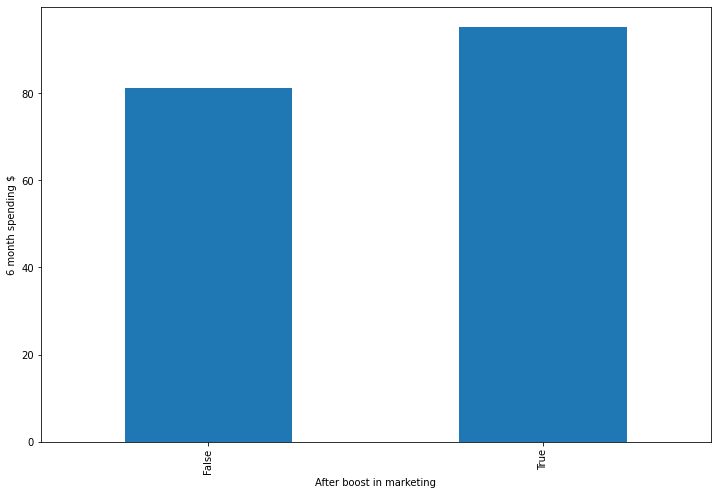

In [75]:
import matplotlib.pyplot as plt
# group the results
df_camp = Cust2.groupby('boost').mean()

# plot the results in a bar graph
_ = df_camp['Life_Total'].plot(kind='bar', figsize=(12,8))
_ = plt.xlabel('After boost in marketing')
_ = plt.ylabel('6 month spending $')
df_camp